<a href="https://colab.research.google.com/github/aristanaya/200030702-forcasting/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

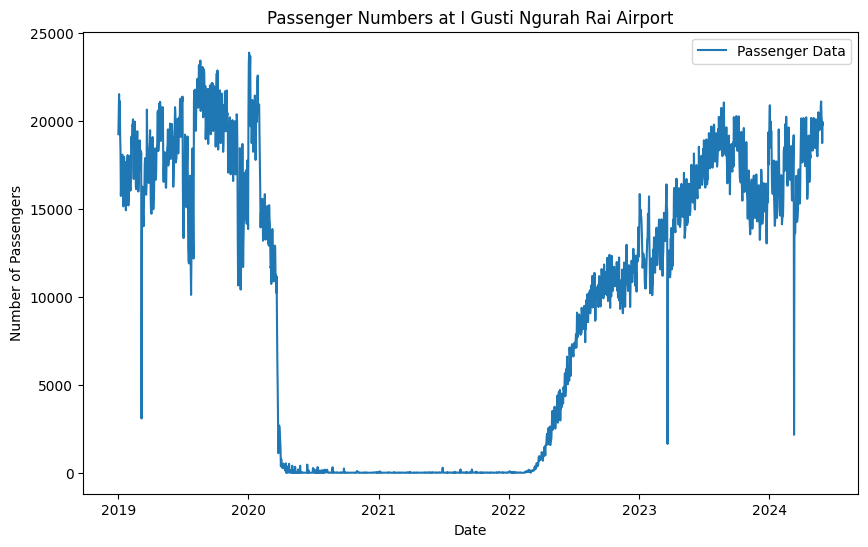

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = './Data Jumlah Penumpang Pesawat.csv'
data = pd.read_csv(file_path)

# Convert 'Tanggal' to datetime and set as index
data['Tanggal'] = pd.to_datetime(data['Tanggal'])
data['Penumpang'] = data['Penumpang'].str.replace(',', '').astype(int)
data.set_index('Tanggal', inplace=True)
data

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Passenger Data')
plt.title('Passenger Numbers at I Gusti Ngurah Rai Airport')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

## Winter's Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


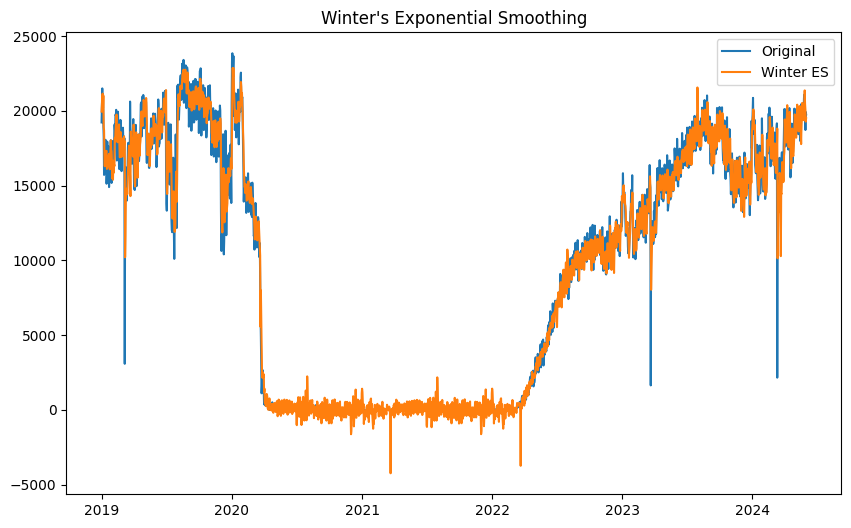

In [2]:
# Apply Winter's Exponential Smoothing
winter_model = ExponentialSmoothing(data, seasonal='add', seasonal_periods=365).fit()
data['Winter_ES'] = winter_model.fittedvalues

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data['Penumpang'], label='Original')
plt.plot(data['Winter_ES'], label='Winter ES')
plt.title("Winter's Exponential Smoothing")
plt.legend()
plt.show()

## Double Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


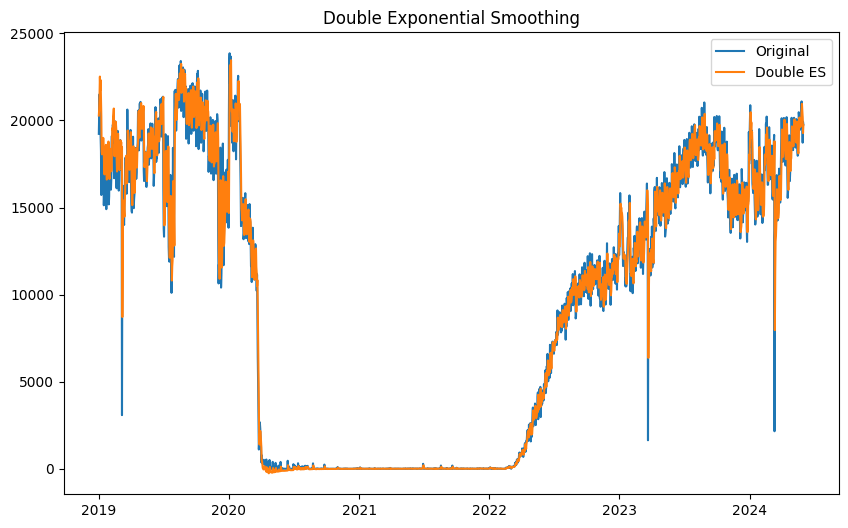

In [3]:
# Apply Double Exponential Smoothing
double_exp_model = Holt(data['Penumpang']).fit()
data['Double_ES'] = double_exp_model.fittedvalues

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data['Penumpang'], label='Original')
plt.plot(data['Double_ES'], label='Double ES')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()

## ARIMA


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Penumpang   No. Observations:                 1978
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -16691.184
Date:                Wed, 07 Aug 2024   AIC                          33394.367
Time:                        11:24:04   BIC                          33427.903
Sample:                    01-01-2019   HQIC                         33406.688
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3556      0.008    -43.693      0.000      -0.372      -0.340
ar.L2         -0.2841      0.014    -20.547      0.000      -0.311      -0.257
ar.L3         -0.2868      0.017    -16.700      0.0

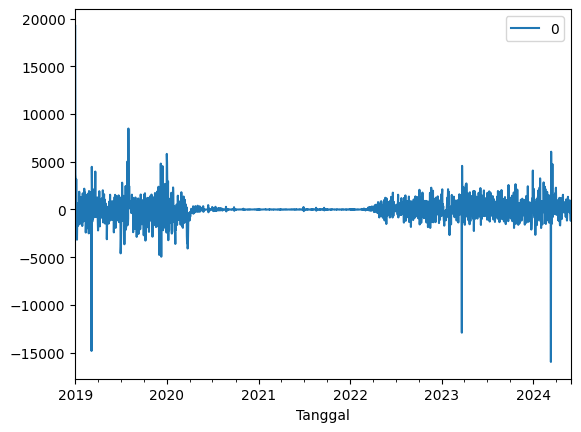

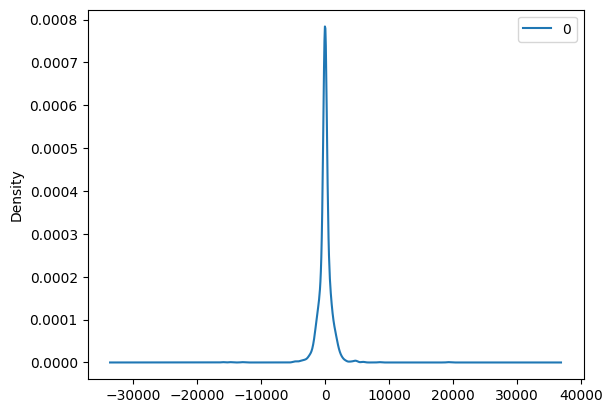

                  0
count   1978.000000
mean      15.642646
std     1203.933501
min   -15968.019895
25%     -256.360560
50%       -0.599120
75%      314.269906
max    19230.000000


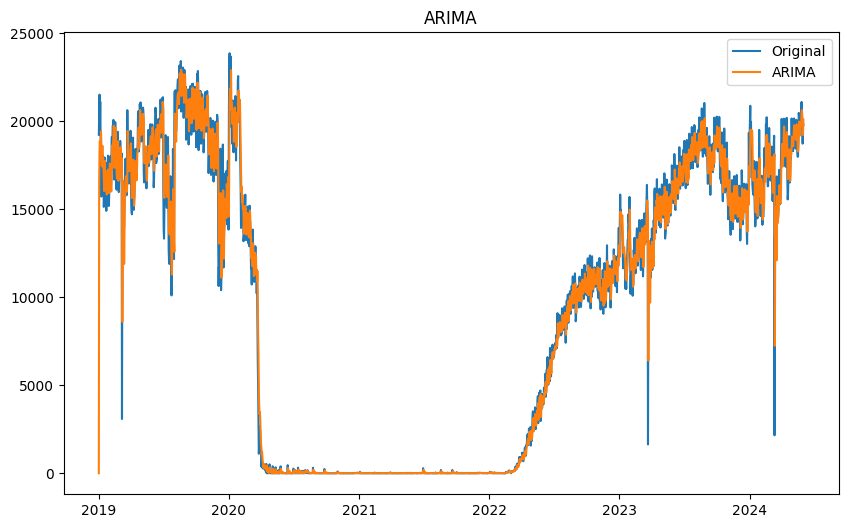

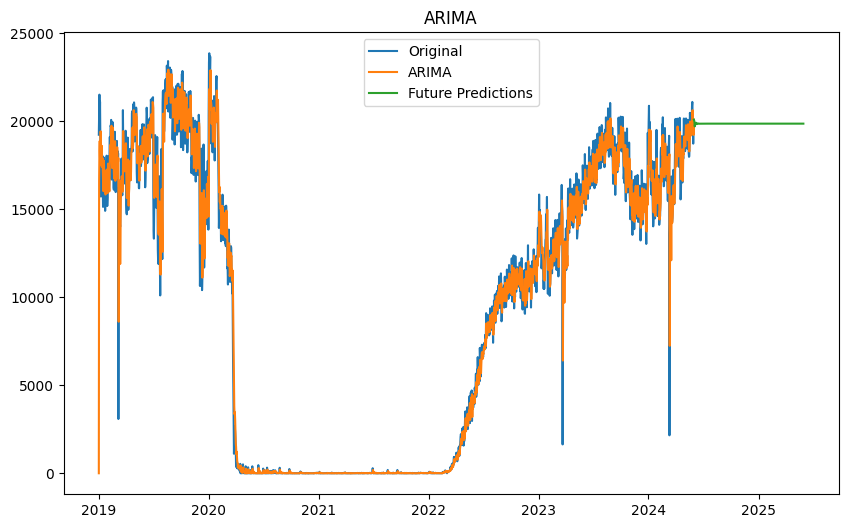

In [4]:
from math import sqrt

# Apply ARIMA
arima_model = ARIMA(data['Penumpang'], order=(5,1,0)).fit()
data['ARIMA'] = arima_model.fittedvalues
print(arima_model.summary())

# line plot of residuals
residuals = pd.DataFrame(arima_model.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data['Penumpang'], label='Original')
plt.plot(data['ARIMA'], label='ARIMA')
plt.title('ARIMA')
plt.legend()
plt.show()


# predict the future
# X = data['Penumpang'].values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()

# # walk-forward validation
# for t in range(len(test)):
#     model = ARIMA(history, order=(5,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))

# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

# plot future predictions from now to 2025
future_predictions = arima_model.forecast(steps=365)
plt.figure(figsize=(10, 6))
plt.plot(data['Penumpang'], label='Original')
plt.plot(data['ARIMA'], label='ARIMA')
plt.plot(pd.date_range(start=data.index[-1], periods=365), future_predictions, label='Future Predictions')
plt.title('ARIMA')
plt.legend()
plt.show()


## Model Evaluation


In [5]:
# Define evaluation metrics
def calculate_metrics(original, predicted):
    mad = mean_absolute_error(original, predicted)
    mse = mean_squared_error(original, predicted)

    # Handle division by zero and remove any infinite values
    mape = np.mean(np.abs((original - predicted) / original[original != 0])) * 100

    # Check for NaN or inf values
    if np.isnan(mape) or np.isinf(mape):
        mape = "N/A"
    else:
        mape = round(mape, 2)  # Round to 2 decimal places

    return mad, mse, mape

# Calculate metrics for each model
metrics = {}
metrics['Winter_ES'] = calculate_metrics(data['Penumpang'], data['Winter_ES'])
metrics['Double_ES'] = calculate_metrics(data['Penumpang'], data['Double_ES'])
metrics['ARIMA'] = calculate_metrics(data['Penumpang'], data['ARIMA'])

# Display the metrics
metrics_df = pd.DataFrame(metrics, index=['MAD', 'MSE', 'MAPE'])
metrics_df

,Winter_ES,Double_ES,ARIMA
MAD,7.266880e+02,6.553402e+02,6.011036e+02
MSE,1.294067e+06,1.448528e+06,1.448968e+06
MAPE,1.357850e+03,7.864000e+01,5.019000e+01


## Forecasting for the Next Year

### Winter's Exponential Smoothing Forecast

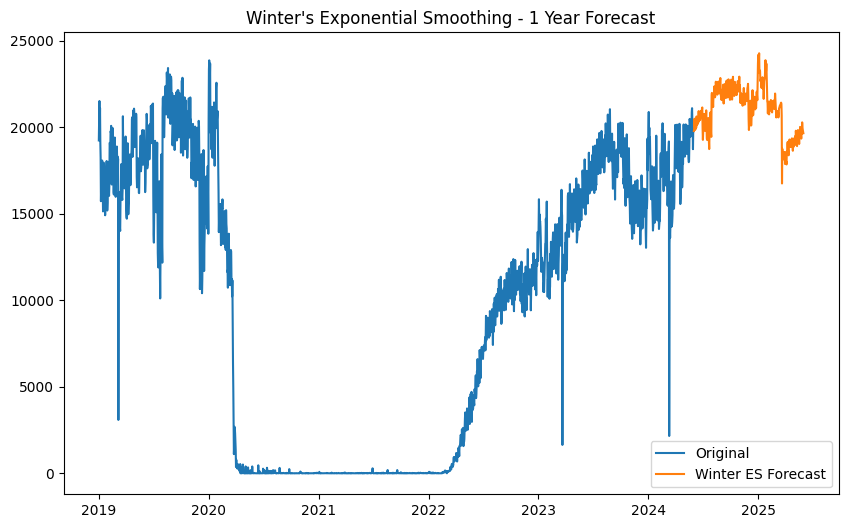

In [6]:
# Forecast the next 12 months using Winter's Exponential Smoothing
winter_forecast = winter_model.forecast(steps=365)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Penumpang'], label='Original')
plt.plot(winter_forecast, label='Winter ES Forecast')
plt.title("Winter's Exponential Smoothing - 1 Year Forecast")
plt.legend()
plt.show()

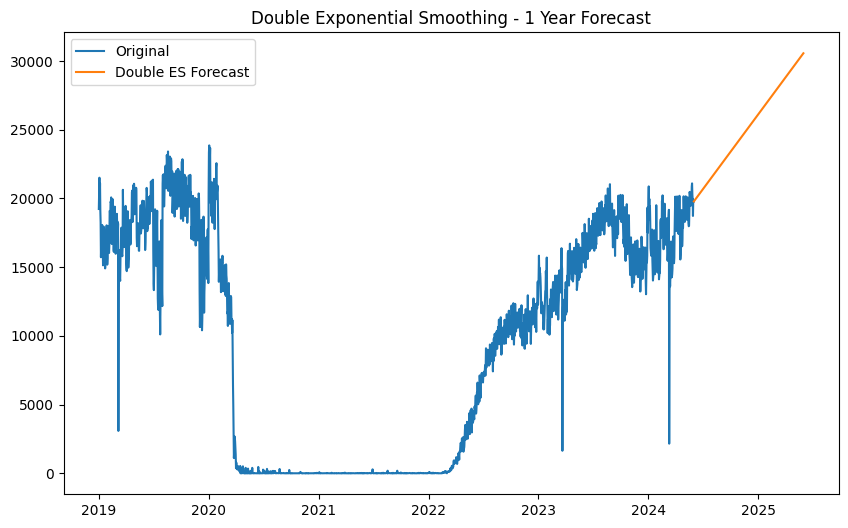

In [ ]:
double_exp_forecast = double_exp_model.forecast(steps=365)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Penumpang'], label='Original')
plt.plot(double_exp_forecast, label='Double ES Forecast')
plt.title('Double Exponential Smoothing - 1 Year Forecast')
plt.legend()
plt.show()

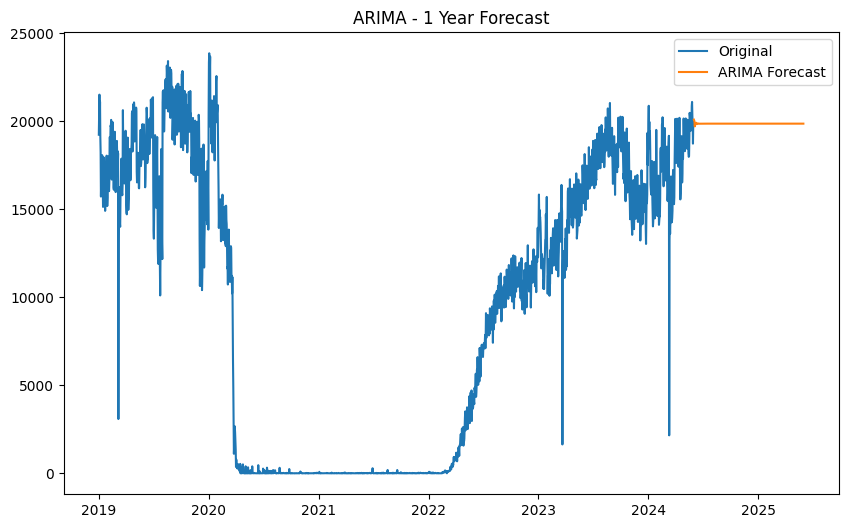

In [ ]:
arima_forecast = arima_model.get_forecast(steps=365).predicted_mean

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Penumpang'], label='Original')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA - 1 Year Forecast')
plt.legend()
plt.show()

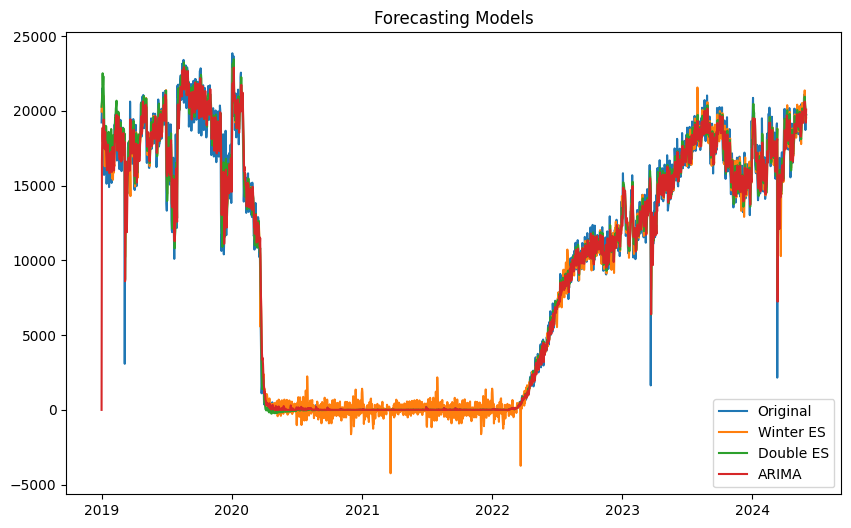

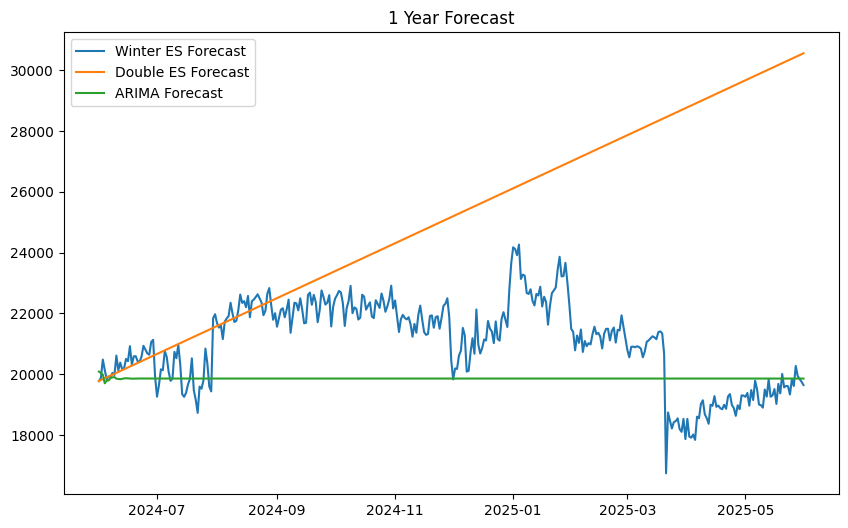

In [ ]:
# make it in one grafik for every model
plt.figure(figsize=(10, 6))
plt.plot(data['Penumpang'], label='Original')
plt.plot(data['Winter_ES'], label='Winter ES')
plt.plot(data['Double_ES'], label='Double ES')
plt.plot(data['ARIMA'], label='ARIMA')
plt.title('Forecasting Models')
plt.legend()
plt.show()

# Plot the forecast
plt.figure(figsize=(10, 6))
# plt.plot(data['Penumpang'], label='Original')
plt.plot(winter_forecast, label='Winter ES Forecast')
plt.plot(double_exp_forecast, label='Double ES Forecast')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.title('1 Year Forecast')
plt.legend()
plt.show()

In [ ]:
# put data in excel file for every model
# just data tanggal from forecasted
data_excel = pd.DataFrame()
data_excel['Winter_ES'] = winter_forecast
data_excel['Double_ES'] = double_exp_forecast
data_excel['ARIMA'] = arima_forecast
data_excel

data_excel.to_excel('Forecasting Models.xlsx')